<b>Question 8:</b>
Write SQL queries on the below database table that return:<br>
a) All the temperature data.<br>
b) All the cities, but without repetition.<br>
c) All the records for India.<br>
d) All the Fall records.<br>
e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.<br>
f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.<br>
g) The total annual rainfall for Cairo.<br>
h) The total rainfall for each season.<br>

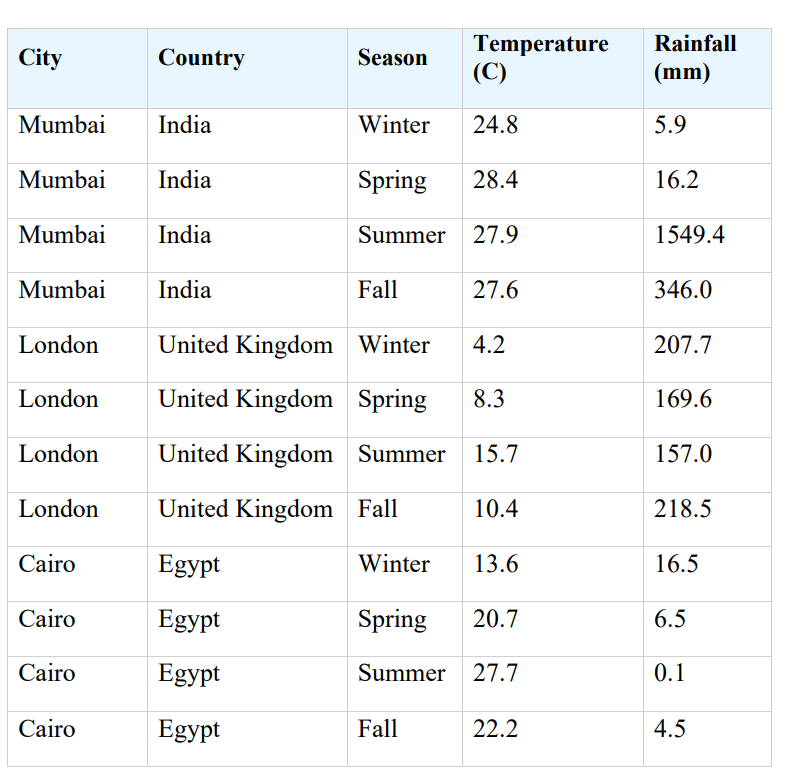

In [ ]:
!pip install db-sqlite3

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1770 sha256=4a0b2d49710a9fb071dd500cb6f137100d4636f84eaf7edde84330a9ba53d14c
  Stored in directory: /root/.cache/pip/wheels/a6/b7/83/e941e0a0e04f417982e718ae7295d1e82b5f2863a1c51edd71
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3874 sha256=e020095e8847ade685beafaa234be340852ccbb5c99bd56062632ea7f8d44fcd
  Stored in directory: /root/.cache/pip/wheels/7d/e4/df/bc55b93af204ab098d9effec76f6889ad12d7ad74e833c4910
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31665 sha256=ef88dd779c974c2bbad992659974d2b14b7813c1aedf6112b86f20b6647f925f
  Stored in directory: /root/.cache/pip/wheels/30/9f/7e/b7c95b391cfa77a9e722d359e9c669cf6c8d798d748aec5091
Successfully built db-sq

In [ ]:
import sqlite3
import pandas as pd

# Connect to a database or connecting with existing one
conn = sqlite3.connect('weather.db')
cursor = conn.cursor()

# Drop the existing table if it is there
cursor.execute("DROP TABLE IF EXISTS weather_data")

# Creating table
sql = '''CREATE TABLE weather_data(
   City TEXT,
   Country TEXT,
   Season TEXT,
   Temperature REAL,
   Rainfall REAL
)'''

cursor.execute(sql)
print("Table created successfully.")

# Inserting data into table we created
data = [
    ('Mumbai', 'India', 'Winter', 24.8, 5.9),
    ('Mumbai', 'India', 'Spring', 28.4, 16.2),
    ('Mumbai', 'India', 'Summer', 27.9, 1549.4),
    ('Mumbai', 'India', 'Fall', 27.6, 346.0),
    ('London', 'United Kingdom', 'Winter', 4.2, 207.7),
    ('London', 'United Kingdom', 'Spring', 8.3, 169.6),
    ('London', 'United Kingdom', 'Summer', 15.7, 157.0),
    ('London', 'United Kingdom', 'Fall', 10.4, 218.5),
    ('Cairo', 'Egypt', 'Winter', 13.6, 16.5),
    ('Cairo', 'Egypt', 'Spring', 20.7, 6.5),
    ('Cairo', 'Egypt', 'Summer', 27.7, 0.1),
    ('Cairo', 'Egypt', 'Fall', 22.2, 4.5)
]

cursor.executeMany("INSERT INTO weather_data VALUES (?, ?, ?, ?, ?)", data)
print("Data inserted successfully.")

conn.commit()

# Define function to execute queries
def executeQuery(query):
    cursor.execute(query)
    results = cursor.fetchall()
    return results

Table created successfully.
Data inserted successfully.


In [ ]:
# a) All the temperature data.
query_a = "SELECT Temperature FROM weather_data"
result_a = executeQuery(query_a)
print("a) All the temperature data:")
print(pd.DataFrame(result_a, columns=["Temperature"]))
print()

a) All the temperature data:
    Temperature
0          24.8
1          28.4
2          27.9
3          27.6
4           4.2
5           8.3
6          15.7
7          10.4
8          13.6
9          20.7
10         27.7
11         22.2



In [ ]:
# b) All the cities, but without repetition.
query_b = "SELECT DISTINCT City FROM weather_data"
result_b = executeQuery(query_b)
print("b) All the cities, but without repetition:")
print(pd.DataFrame(result_b, columns=["City"]))
print()

b) All the cities, but without repetition:
     City
0  Mumbai
1  London
2   Cairo



In [ ]:
# c) All the records for India.
query_c = "SELECT * FROM weather_data WHERE Country = 'India'"
result_c = executeQuery(query_c)
print("c) All the records for India:")
print(pd.DataFrame(result_c, columns=["City", "Country", "Season", "Temperature", "Rainfall"]))
print()

c) All the records for India:
     City Country  Season  Temperature  Rainfall
0  Mumbai   India  Winter         24.8       5.9
1  Mumbai   India  Spring         28.4      16.2
2  Mumbai   India  Summer         27.9    1549.4
3  Mumbai   India    Fall         27.6     346.0



In [ ]:
# d) All the Fall records.
query_d = "SELECT * FROM weather_data WHERE Season = 'Fall'"
result_d = executeQuery(query_d)
print("d) All the Fall records:")
print(pd.DataFrame(result_d, columns=["City", "Country", "Season", "Temperature", "Rainfall"]))
print()

d) All the Fall records:
     City         Country Season  Temperature  Rainfall
0  Mumbai           India   Fall         27.6     346.0
1  London  United Kingdom   Fall         10.4     218.5
2   Cairo           Egypt   Fall         22.2       4.5



In [ ]:
# e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters.
query_e = "SELECT City, Country, Season FROM weather_data WHERE Rainfall BETWEEN 200 AND 400"
result_e = executeQuery(query_e)
print("e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters:")
print(pd.DataFrame(result_e, columns=["City", "Country", "Season"]))
print()

e) The city, country, and season for which the average rainfall is between 200 and 400 millimeters:
     City         Country  Season
0  Mumbai           India    Fall
1  London  United Kingdom  Winter
2  London  United Kingdom    Fall



In [ ]:
# f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order.
query_f = "SELECT City, Country FROM weather_data WHERE Season = 'Fall' AND Temperature > 20 ORDER BY Temperature ASC"
result_f = executeQuery(query_f)
print("f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order:")
print(pd.DataFrame(result_f, columns=["City", "Country"]))
print()

f) The city and country for which the average Fall temperature is above 20 degrees, in increasing temperature order:
     City Country
0   Cairo   Egypt
1  Mumbai   India



In [ ]:
# g) The total annual rainfall for Cairo.
query_g = "SELECT SUM(Rainfall) FROM weather_data WHERE City = 'Cairo'"
result_g = executeQuery(query_g)
print("g) The total annual rainfall for Cairo:")
print(result_g[0][0])
print()

g) The total annual rainfall for Cairo:
27.6



In [ ]:
# h) The total rainfall for each season.
query_h = "SELECT Season, SUM(Rainfall) AS Total_Rainfall FROM weather_data GROUP BY Season"
result_h = executeQuery(query_h)
print("h) The total rainfall for each season:")
print(pd.DataFrame(result_h, columns=["Season", "Total_Rainfall"]))
print()

h) The total rainfall for each season:
   Season  Total_Rainfall
0    Fall           569.0
1  Spring           192.3
2  Summer          1706.5
3  Winter           230.1



In [ ]:
# Closing the connection
conn.close()